In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('IPG2211A2N.csv')
df

,observation_date,IPG2211A2N
0,1939-01-01,3.3336
1,1939-02-01,3.3591
2,1939-03-01,3.4354
3,1939-04-01,3.4608
4,1939-05-01,3.4608
...,...,...
967,2019-08-01,112.3547
968,2019-09-01,103.1333
969,2019-10-01,93.8206
970,2019-11-01,99.9782


In [3]:
df.head(5)

,observation_date,IPG2211A2N
0,1939-01-01,3.3336
1,1939-02-01,3.3591
2,1939-03-01,3.4354
3,1939-04-01,3.4608
4,1939-05-01,3.4608


In [7]:
df.isnull()

,observation_date,IPG2211A2N
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
967,False,False
968,False,False
969,False,False
970,False,False


In [9]:
df.isnull().sum()

observation_date    0
IPG2211A2N          0
dtype: int64

In [72]:
df.dtypes

Production of electric utilities    float64
dtype: object

In [13]:
df.dtypes

observation_date     object
IPG2211A2N          float64
dtype: object

In [15]:
df['observation_date'] = pd.to_datetime(df.observation_date)


In [17]:
df.dtypes

observation_date    datetime64[ns]
IPG2211A2N                 float64
dtype: object

In [31]:
df.rename(columns = {'IPG2211A2N' : 'Production of electric utilities'}, inplace = True)

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='Production of electric utilities'>

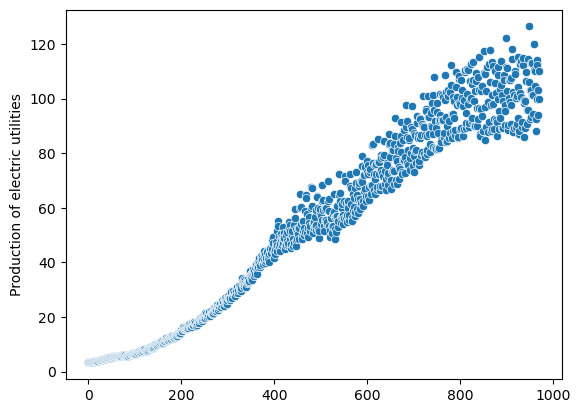

In [37]:
sns.scatterplot(df['Production of electric utilities'])

In [39]:
import statsmodels.api as smf
import statsmodels.tsa.api as smt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

In [41]:
df.set_index('observation_date', inplace = True)

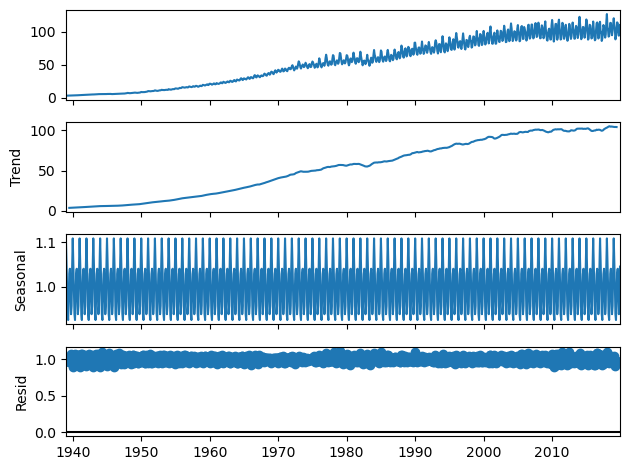

In [43]:
sd = seasonal_decompose(df, model = 'multiplicative')
sd.plot()
plt.show()

In [44]:
average = sum(df['Production of electric utilities'])/len(df['Production of electric utilities'])
print("expected value : ", average)

expected value :  54.003225925925925


In [47]:
varience = np.var(df['Production of electric utilities'])
varience

1223.2396110537113

In [53]:
varience1 = np.var(df['Production of electric utilities'][1:])
varience1

1221.852571434753

In [55]:
smt.acovf(sd.observed, nlag = 1)

array([1223.23961105, 1205.71442521])

In [59]:
smt.acovf(df)[0:2]

array([1223.23961105, 1205.71442521])

In [61]:
smt.acf(sd.observed, nlags = 1)

array([1.        , 0.98567314])

<bound method Figure.show of <Figure size 640x480 with 1 Axes>>

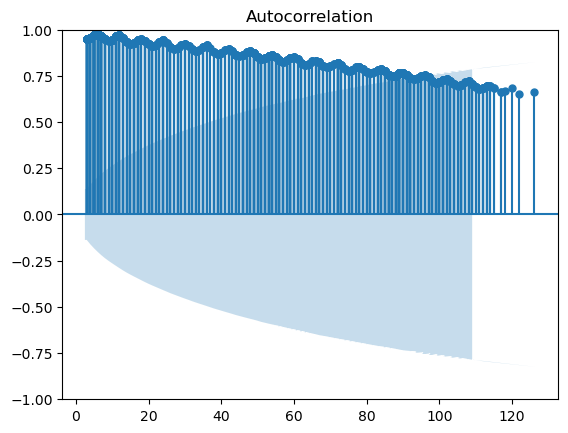

In [63]:
plot_acf(sd.observed, lags =sd.observed[1:]).show

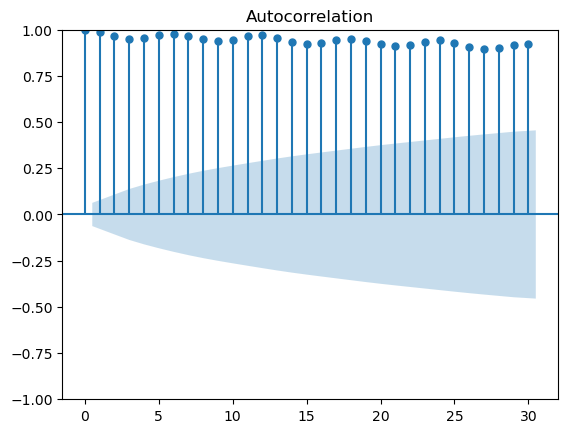

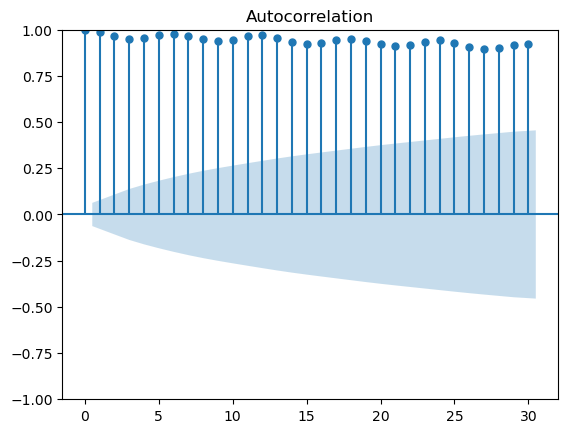

In [70]:
plot_acf(df)